# Cis 340 Final Exam - Part 2
- (15 pts) **Part 2a: Pivoting Data and Plotting it with pandas *plot()***    
- (15 pts) **Part 2b: Groupby and Bar Chart with pandas *plot()***    
- (20 pts) **Part 2c: Yahoo Financial and cufflinks**      

**Important Reminder:**  *You must show the results of each of your steps! If you do the step, but then don't show that the results were successful, you will receive a zero for it.*

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
import pandas_datareader.data as web
import datetime as dt

In [3]:
import plotly.plotly as py
import plotly.graph_objs as go
import plotly
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
cf.set_config_file(offline=True)

# Part 2a: Pivot and Line Chart with pandas plot()    

### Read the *Final_Stocks.csv* data file into a dataframe  
- Note: This data file is in the **Data** folder, under the **Final_Exam** folder, in the class content repo

In [4]:
df_stocks = pd.read_csv('Data//Final_Stocks.csv')

df_stocks.head()

CloseDate StockName  ClosingPrice
0  1/3/2007      Aapl     11.107141
1  2/1/2007      Aapl     10.962033
2  3/1/2007      Aapl     12.037377
3  4/2/2007      Aapl     12.930043
4  5/1/2007      Aapl     15.701322

### Change data types as needed

In [5]:
df_stocks.dtypes

CloseDate        object
StockName        object
ClosingPrice    float64
dtype: object

In [6]:
df_stocks['CloseDate'] = pd.to_datetime(df_stocks['CloseDate'])

df_stocks.dtypes

CloseDate       datetime64[ns]
StockName               object
ClosingPrice           float64
dtype: object

### (10 pts) Pivot the data  
- After the *pivot*: the date should be the index, the columns should be stock names and the values should be the closing prices.

In [7]:
df_wide_stocks = df_stocks.pivot(index='CloseDate', columns='StockName', values='ClosingPrice')

df_wide_stocks.head()

StockName        Aapl       Adbe        Goog        IBM       Mdlz       Msft  \
CloseDate                                                                       
2007-01-03  11.107141  38.869999  251.001007  79.242500  17.519524  24.118483   
2007-02-01  10.962033  39.250000  224.949951  74.503204  16.019426  22.092464   
2007-03-01  12.037377  41.700001  229.309311  75.561348  16.009354  21.857189   
2007-04-02  12.930043  41.560001  235.925919  81.934280  16.924608  23.480597   
2007-05-01  15.701322  44.060001  249.204208  85.786057  17.111704  24.146753   

StockName        Orcl       Sbux  
CloseDate                         
2007-01-03  15.696321  15.752188  
2007-02-01  15.028588  13.930813  
2007-03-01  16.583584  14.138198  
2007-04-02  17.196436  13.984914  
2007-05-01  17.726965  12.988567

### (5 pts) Use pandas *plot()* to create a Line Chart for Mdlz and Sbux

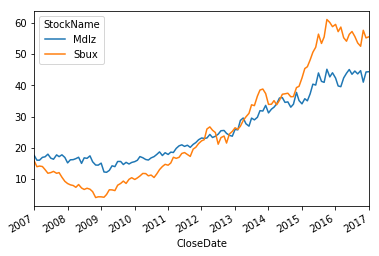

In [8]:
stocks = ['Mdlz', 'Sbux']

df_wide_stocks[stocks].plot.line()

# Part 2b: Groupby and Bar Chart with pandas plot()

### Read stock data into dataframe  

- **Important Note:**  *Do not change the data hardcoded df_sales below!  You must use it exactly as is.*

In [9]:
# Data to work on
df_sales = pd.DataFrame(
    [
    ['11/11/2014','Oklahoma','Technology','$221.98'], 
    ['11/11/2014','Oklahoma','Furniture','$341.96'],
    ['3/6/2012','Washington','Furniture','$48.71'],
    ['3/6/2012','Washington','Office Supplies','$17.94'],
    ['2/19/2012','Texas','Office Supplies','$12.62'],
    ['3/6/2012','Washington','Office Supplies','$242.94'],
    ['4/21/2012','New York','Office Supplies','$247.84'],
    ['12/27/2013','California','Technology','$668.16'],
    ['12/27/2013','California','Office Supplies','$323.10'],
    ['5/12/2012','California','Furniture','$279.46'],
    ['12/30/2012','New York','Technology','$34.77'],
    ['3/21/2014','Mississippi','Furniture','$86.45'],
    ], 
    columns=['Order Date','State','Category','Sales'])
  
df_sales

Order Date        State         Category    Sales
0   11/11/2014     Oklahoma       Technology  $221.98
1   11/11/2014     Oklahoma        Furniture  $341.96
2     3/6/2012   Washington        Furniture   $48.71
3     3/6/2012   Washington  Office Supplies   $17.94
4    2/19/2012        Texas  Office Supplies   $12.62
5     3/6/2012   Washington  Office Supplies  $242.94
6    4/21/2012     New York  Office Supplies  $247.84
7   12/27/2013   California       Technology  $668.16
8   12/27/2013   California  Office Supplies  $323.10
9    5/12/2012   California        Furniture  $279.46
10  12/30/2012     New York       Technology   $34.77
11   3/21/2014  Mississippi        Furniture   $86.45

### Clean up field junk and change data types as needed

In [10]:
df_sales.dtypes

Order Date    object
State         object
Category      object
Sales         object
dtype: object

In [11]:
df_sales['Order Date'] = pd.to_datetime(df_sales['Order Date'])
df_sales['Sales'] = df_sales['Sales'].str.replace('$', '')
df_sales['Sales'] = df_sales['Sales'].str.replace(',', '')
df_sales['Sales'] = pd.to_numeric(df_sales['Sales']).astype(float)

df_sales.dtypes

Order Date    datetime64[ns]
State                 object
Category              object
Sales                float64
dtype: object

### (10 pts) Use groupby to Group data  
- Group by:  Category  
- For: Sales  
- Function:  sum()

In [12]:
category_by_sales = df_sales.groupby("Category")['Sales'].sum()

category_by_sales.head()

Category
Furniture          756.58
Office Supplies    844.44
Technology         924.91
Name: Sales, dtype: float64

### (5 pts) Plot the Grouped data as a Bar Chart using pandas plot()

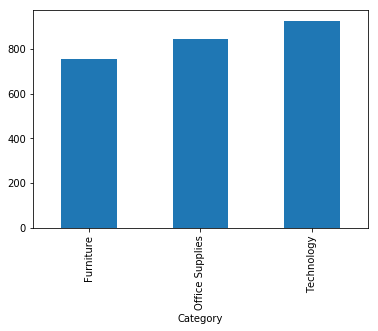

In [13]:
category_by_sales.plot.bar()

# Part 2c: Yahoo Financial and cufflinks  

### Retrieve Stock Data using Yahoo Financial  
- Stocks to Retrieve from Yahoo Financial: **CSCO, INTC, VZ, UTX**   
- Values to plot: **Open** 
- Timeframe: **2013-2016** 

In [14]:
# Start for Stock series:  Jan 1, 2014
start = dt.datetime(2013, 1, 1)

# End of Stock series:  Dec 31, 2018
end = dt.datetime(2016, 12, 31)

In [15]:
stocks_to_retrieve = ['CSCO', 'INTC', 'VZ', 'UTX']
df = web.DataReader(stocks_to_retrieve, 'yahoo', start, end)
df.head()

Attributes   High                                         Low             \
Symbols      CSCO       INTC        UTX         VZ       CSCO       INTC   
Date                                                                       
2013-01-02  20.34  21.379999  84.000000  44.509998  20.010000  21.049999   
2013-01-03  20.50  21.480000  84.459999  44.419998  20.299999  21.139999   
2013-01-04  20.68  21.389999  84.989998  44.360001  20.389999  21.049999   
2013-01-07  20.42  21.450001  84.989998  44.869999  20.160000  21.180000   
2013-01-08  20.34  21.559999  84.709999  44.259998  20.080000  21.020000   

Attributes                             Open             ...      Close  \
Symbols           UTX         VZ       CSCO       INTC  ...        UTX   
Date                                                    ...              
2013-01-02  83.110001  43.840000  20.120001  21.150000  ...  84.000000   
2013-01-03  83.410004  43.790001  20.459999  21.400000  ...  84.309998   
2013-01-04  84.070000  43.750000  20.410000  21.360001  ...  84.980003   
2013-01-07  84.370003  44.009998  20.379999  21.280001  ...  84.570000   
2013-01-08  83.250000  43.040001  20.180000  21.230000  ...  83.550003   

Attributes                 Volume                                     \
Symbols            VZ        CSCO        INTC        UTX          VZ   
Date                                                                   
2013-01-02  44.270000  40304500.0  47623000.0  4485200.0  16483900.0   
2013-01-03  44.060001  50603500.0  41054100.0  3786600.0  11227700.0   
2013-01-04  44.299999  36378900.0  30142500.0  3855900.0  14930400.0   
2013-01-07  44.689999  30790700.0  36352100.0  3378500.0  20891300.0   
2013-01-08  43.099998  33218100.0  48672000.0  4830600.0  21394400.0   

Attributes  Adj Close                                   
Symbols          CSCO       INTC        UTX         VZ  
Date                                                    
2013-01-02  16.701340  17.546545  72.661156  33.018829  
2013-01-03  16.791662  17.497303  72.929321  32.862202  
2013-01-04  16.816288  17.365988  73.508873  33.041203  
2013-01-07  16.660280  17.439857  73.154205  33.332085  
2013-01-08  16.676702  17.308540  72.271912  32.520947  

[5 rows x 24 columns]

In [16]:
df_open = df['Open']
df_open.head()

Symbols          CSCO       INTC        UTX         VZ
Date                                                  
2013-01-02  20.120001  21.150000  83.430000  44.490002
2013-01-03  20.459999  21.400000  83.750000  44.360001
2013-01-04  20.410000  21.360001  84.470001  44.040001
2013-01-07  20.379999  21.280001  84.540001  44.250000
2013-01-08  20.180000  21.230000  84.389999  44.029999

### (5 pts) Plot 1:  CSCO and INTC using cufflinks 
- Chart Type:  **Line Chart**  
- Chart Title: **Line Chart:  Cisco and Intel:  2013-2016**

In [17]:
index = ['CSCO', 'INTC']
df_open[index].iplot(kind='line',
                xTitle='Dates',
                yTitle='Stock Price',
                theme='space',
                title='Line Chart: Cisco and Intel: 2013-2016')

### (5 pts) Plot 2:  VZ and UTX using cufflinks 
- Chart Type:  **Spread Chart**  
- Chart Title: **Spread Chart - VZ and UTX:  2013-2016**

In [18]:
index = ['VZ', 'UTX']
df_open[index].iplot(kind='spread',
                xTitle='Dates',
                yTitle='Stock Price',
                theme='space',
                title='Spread Chart - VZ and UTX: 2013-2016')

### (10 pts) Plot 3: CSCO and VZ, 2nd Quarter 2013
- Use **loc** to get stock prices for just April, May and June of 2013 
- Chart Type:  **Filled Line Chart**  
- Chart Title: **CSCO and VZ, Openings, 2nd Quarter 2013**

In [20]:
df_quarter_2 = df_open.loc['2013-04-01':'2013-06-30']

index = ['CSCO', 'VZ']
df_quarter_2[index].iplot(kind='line',
                        fill = True, 
                xTitle='Dates',
                yTitle='Stock Price',
                theme='space',
                title='CSCO and VZ, Openings, 2nd Quarter 2013')